In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re 
city_location = dict()
pattern = re.compile(r"name:'(\w+)', geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    print(city_info)
    city,long,lat = city_info[0]
    long,lat = float(long),float(lat)
    city_location[city] = (long,lat)

[('兰州', '103.73', '36.03')]
[('嘉峪关', '98.17', '39.47')]
[('西宁', '101.74', '36.56')]
[('成都', '104.06', '30.67')]
[('石家庄', '114.48', '38.03')]
[('拉萨', '102.73', '25.04')]
[('贵阳', '106.71', '26.57')]
[('武汉', '114.31', '30.52')]
[('郑州', '113.65', '34.76')]
[('济南', '117', '36.65')]
[('南京', '118.78', '32.04')]
[('合肥', '117.27', '31.86')]
[('杭州', '120.19', '30.26')]
[('南昌', '115.89', '28.68')]
[('福州', '119.3', '26.08')]
[('广州', '113.23', '23.16')]
[('长沙', '113', '28.21')]
[('海口', '110.35', '20.02')]
[('沈阳', '123.38', '41.8')]
[('长春', '125.35', '43.88')]
[('哈尔滨', '126.63', '45.75')]
[('太原', '112.53', '37.87')]
[('西安', '108.95', '34.27')]
[('台湾', '121.30', '25.03')]
[('北京', '116.46', '39.92')]
[('上海', '121.48', '31.22')]
[('重庆', '106.54', '29.59')]
[('天津', '117.2', '39.13')]
[('呼和浩特', '111.65', '40.82')]
[('南宁', '108.33', '22.84')]
[('西藏', '91.11', '29.97')]
[('银川', '106.27', '38.47')]
[('乌鲁木齐', '87.68', '43.77')]
[('香港', '114.17', '22.28')]
[('澳门', '113.54', '22.19')]


In [3]:
import math
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

def get_geo_distance(city1,city2):
    return geo_distance(city_location[city1],city_location[city2])
get_geo_distance('上海','杭州')

153.5185697155768

In [4]:
import networkx as nx
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_location.keys()))
%matplotlib inline

In [5]:
import matplotlib
print(matplotlib.__path__)

['/home/chihao/miniconda3/lib/python3.7/site-packages/matplotlib']


/home/chihao/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


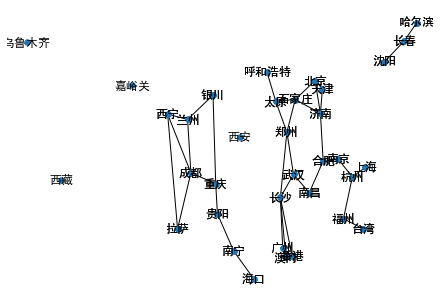

In [10]:
import matplotlib.pyplot as plt
from collections import defaultdict
nx.draw(city_graph,city_location,with_labels=True,node_size=30)
threshold = 300
city_connection = defaultdict(list)
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2 :
            continue
        else:
            distance = get_geo_distance(c1,c2)
            if distance <threshold:
                city_connection[c1].append(c2)
                city_connection[c2].append(c1)
city_with_road = nx.Graph(city_connection)
nx.draw(city_with_road,city_location,with_labels=True,node_size=30)

In [16]:
def bfs(graph,start):
    visited = set()
    queue = [start]
    result = []
    while queue:
        city = queue.pop(0)
        for connect in graph[city]:
            if connect in visited:
                continue
            else:
                queue.append(connect)
                result.append(connect)
                visited.add(connect)
    return result


北京
石家庄
济南
天津
郑州
太原
北京
合肥
武汉
长沙
呼和浩特
南京
南昌
广州
香港
澳门
杭州
福州
上海
台湾


['石家庄',
 '济南',
 '天津',
 '郑州',
 '太原',
 '北京',
 '合肥',
 '武汉',
 '长沙',
 '呼和浩特',
 '南京',
 '南昌',
 '广州',
 '香港',
 '澳门',
 '杭州',
 '福州',
 '上海',
 '台湾']

In [ ]:
def search(start,destination,connection_graph,sort_candidate):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        frontier= path[-1]
        if frontier in visited: continue
        
        successors = connection_graph[frontier]
        for city in successors:
            if city in path : continue
            new_path = path +[city]
            pathes.append(new_path)
            i
            